Acurácia do modelo Random Forest: 1.0000

Importância das características:
                         Feature  Importance
6                     flavanoids    0.202293
9                color_intensity    0.171202
12                       proline    0.139046
0                        alcohol    0.112398
11  od280/od315_of_diluted_wines    0.111564
10                           hue    0.070891
4                      magnesium    0.036841
1                     malic_acid    0.035703
3              alcalinity_of_ash    0.032425
5                  total_phenols    0.029279
8                proanthocyanins    0.023561
2                            ash    0.021282
7           nonflavanoid_phenols    0.013515


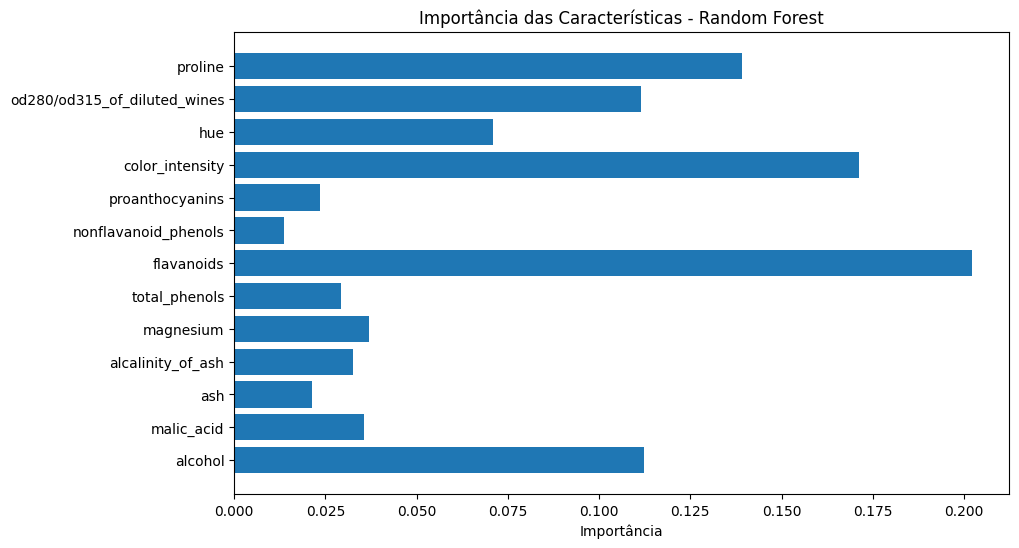

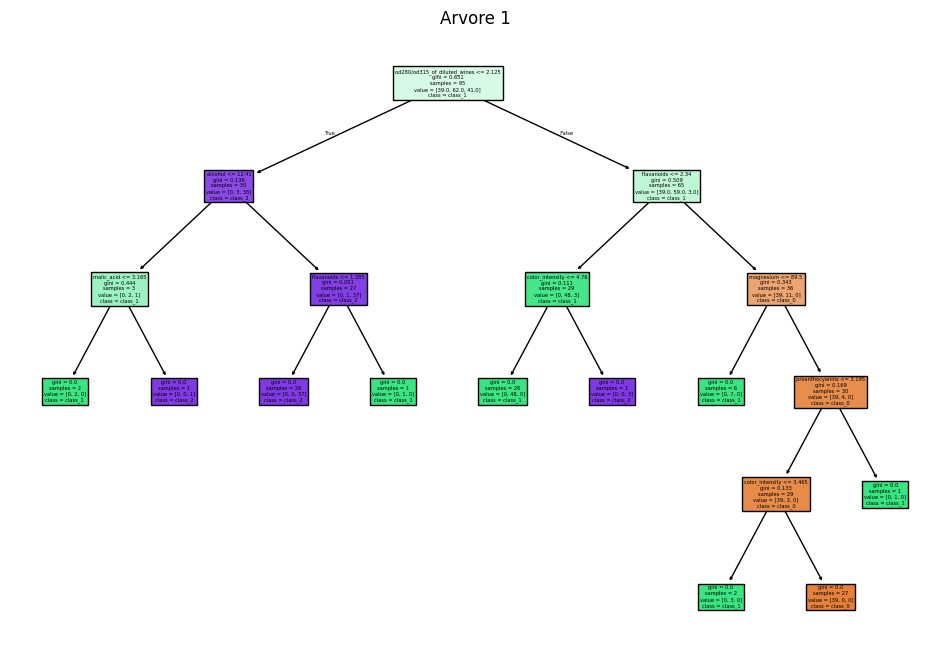

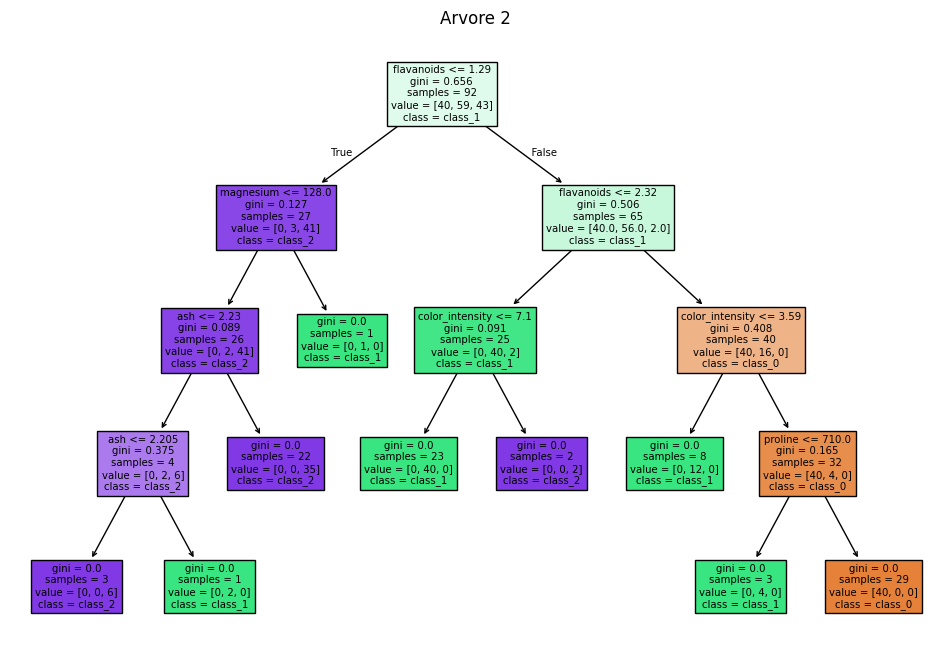

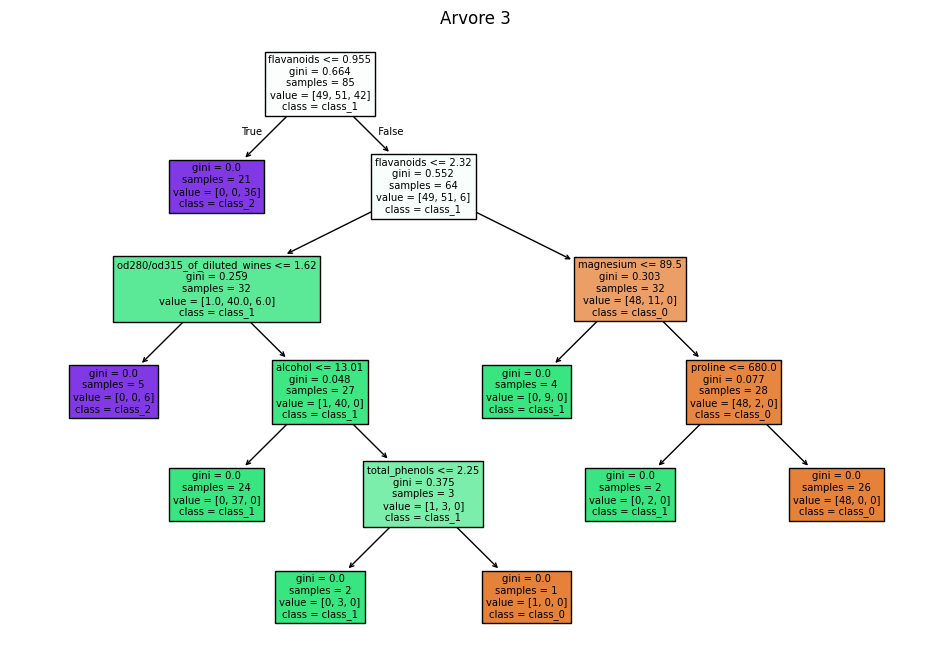

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# 1. Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data
y = wine.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Treinando o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Avaliando o modelo
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Random Forest: {accuracy:.4f}")

# 4. Avaliando a importância das características
feature_importances = rf_model.feature_importances_

# Exibindo as importâncias das características
feature_names = wine.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("\nImportância das características:")
print(importance_df.sort_values(by='Importance', ascending=False))

# Plotando a importância das características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Características - Random Forest')
plt.show()

# 5. Visualizando algumas árvores individuais
n_trees_to_plot = 3  # Definindo o número de árvores que queremos visualizar
for i in range(min(n_trees_to_plot, len(rf_model.estimators_))):
    plt.figure(figsize=(12, 8))
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=feature_names, class_names=wine.target_names)
    plt.title(f'Arvore {i+1}')
    plt.show()
